<a href="https://colab.research.google.com/github/frederikvanduuren/Mentor-Sessions-1-10/blob/master/final_Session2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Not an ideal network**

install and import keras using tensorflow backend



In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


import models/layers to be able to apply Convolution2D/Flatten

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Convolution2D
from keras.utils import np_utils

from keras.datasets import mnist

Using TensorFlow backend.


loading the MNIST dataset from keras-datasets



In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


Lets visualize some samples... subplot in gray

(60000, 28, 28)


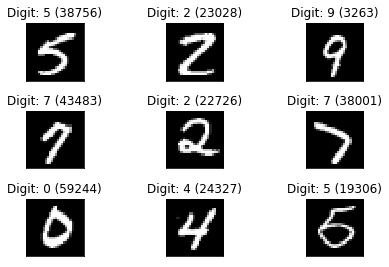

In [0]:
print (X_train.shape)
#from matplotlib import pyplot as plt
#%matplotlib inline
#plt.imshow(X_train[0])
# or
import matplotlib.pyplot as plt
import random
fig = plt.figure() # Create a new figure
for i in range(9): # draw 9 figures
  plt.subplot(3,3,i+1) #subplot(nrows, ncols, index)
  plt.tight_layout() # Automatically adjust subplot parameters to give tight padding
  j = random.randint(1, X_train.shape[0]) # random image between 1 and 600000
  plt.imshow(X_train[j], cmap='gray', interpolation='none') #display image in gray
  plt.title("Digit: {} ({})".format(y_train[j],j)) #set title above the image: value + index from random
  plt.xticks([])
  plt.yticks([])


transform our dataset from having shape (n, width, height) to (n, width, height, depth=1).

resizing the input images, For tensorflow, the format is (N,H,W,C)

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28 ,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28 ,1)

process the input data is to convert our data type to float32 and normalizing values between 0 and 1


In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
print (y_train[:10])
print (X_train.shape)
print (y_train.shape)

[5 0 4 1 9 2 1 3 1 4]
(60000, 28, 28, 1)
(60000,)


converting into categorical formats:

---

0 = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1 = [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
2 = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
...
9 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print (Y_train.shape)

(60000, 10)


In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation, MaxPooling2D

model = Sequential() # init of a sequential model
# Convolution2D(number of convolution filters, rows kernel, cols kernel)
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) # ref  (width, height, depth) of each digit image
print ("output_channels * (input_channels * window_size + 1) == number_parameters")
# input 26x26x32
print ("Convolution2D(32, 3, 3) dim -> {}".format(model.output_shape))
model.add(Convolution2D(64, 3, 3, activation='relu'))
# input 24x24x64
print ("Convolution2D(64, 3, 3) dim -> {}".format(model.output_shape))
model.add(Convolution2D(128, 3, 3, activation='relu'))
print ("Convolution2D(128, 3, 3) dim -> {}".format(model.output_shape))
# input 22x22x128
model.add(MaxPooling2D(pool_size=(2, 2))) 
#reducing the number of parameters in our model by sliding a 2x2 pooling filter across the previous layer and taking the max of the 4 values in the 2x2 filter
print ("MaxPooling2D(2,2) dim -> {}".format(model.output_shape))
# input 11x11x128
model.add(Convolution2D(256, 3, 3, activation='relu'))
print ("Convolution2D(256, 3, 3) dim -> {}".format(model.output_shape))
# input 9x9x256
model.add(Convolution2D(512, 3, 3, activation='relu'))
print ("Convolution2D(512, 3, 3) dim -> {}".format(model.output_shape))
# input 7x7x512
model.add(Convolution2D(1024, 3, 3, activation='relu'))
print ("Convolution2D(1024, 3, 3) dim -> {}".format(model.output_shape))
# input 5x5x1024
model.add(Convolution2D(2048, 3, 3, activation='relu'))
print ("Convolution2D(2048, 3, 3) dim -> {}".format(model.output_shape))
# input 3x3xx2048
model.add(Convolution2D(10, 3, 3, activation='relu'))
print ("Convolution2D(10, 3, 3) dim -> {}".format(model.output_shape))
# input 1x1x10
model.add(Flatten())
# Softmax makes the output sum up to 1 so the output can be interpreted as probabilities. 
model.add(Activation('softmax')) 
# The model will then make its prediction based on which option has the highest probability

model.summary()

output_channels * (input_channels * window_size + 1) == number_parameters
Convolution2D(32, 3, 3) dim -> (None, 26, 26, 32)
Convolution2D(64, 3, 3) dim -> (None, 24, 24, 64)
Convolution2D(128, 3, 3) dim -> (None, 22, 22, 128)
MaxPooling2D(2,2) dim -> (None, 11, 11, 128)
Convolution2D(256, 3, 3) dim -> (None, 9, 9, 256)
Convolution2D(512, 3, 3) dim -> (None, 7, 7, 512)
Convolution2D(1024, 3, 3) dim -> (None, 5, 5, 1024)
Convolution2D(2048, 3, 3) dim -> (None, 3, 3, 2048)
Convolution2D(10, 3, 3) dim -> (None, 1, 1, 10)
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 22, 22, 128)       7385

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Update your `Co

## But here we go to deep for the simplicity of the dataset, ie we are not extracting/learning anything in the last layers. Never able to find any accurate final layer with a total of 4202 images in model!


Notice at as our output spatial volume is decreasing our number of filters learned is increasing.

We may need to tune the exact value depending on (1) the complexity of your dataset and (2) the depth of your neural network, starting with filters in the range [32, 64, 128] in the earlier and increasing up to [256, 512, 1024] in the deeper layers


In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

Train on 40199 samples, validate on 19801 samples
Epoch 1/10
40199/40199 [==============================] - 7s 165us/step - loss: 3.4190e-04 - acc: 0.9999 - val_loss: 0.0040 - val_acc: 0.9993
Epoch 2/10
40199/40199 [==============================] - 6s 161us/step - loss: 0.0011 - acc: 0.9998 - val_loss: 0.0049 - val_acc: 0.9992
Epoch 3/10
40199/40199 [==============================] - 6s 159us/step - loss: 0.0069 - acc: 0.9984 - val_loss: 0.0041 - val_acc: 0.9991
Epoch 4/10
40199/40199 [==============================] - 6s 158us/step - loss: 0.0013 - acc: 0.9995 - val_loss: 0.0034 - val_acc: 0.9992
Epoch 5/10
40199/40199 [==============================] - 6s 159us/step - loss: 2.9807e-04 - acc: 1.0000 - val_loss: 0.0025 - val_acc: 0.9994
Epoch 6/10
40199/40199 [==============================] - 6s 159us/step - loss: 1.4398e-05 - acc: 1.0000 - val_loss: 0.0022 - val_acc: 0.9996
Epoch 7/10
40199/40199 [==============================] - 6s 157us/step - loss: 1.5757e-06 - acc: 1.0000 - val

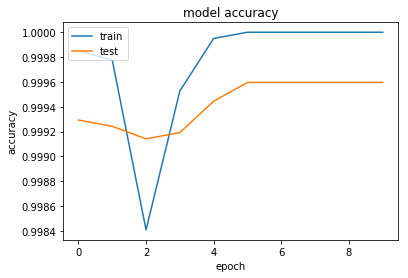

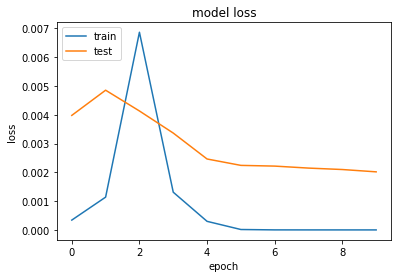

In [0]:
history = model.fit(X_train, Y_train, validation_split=0.33, batch_size=32, epochs=10, verbose=1)
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
layer_names = []
for layer in model.layers[:4]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
layer_names

['conv2d_13', 'conv2d_14', 'flatten_5', 'dense_4']

In [0]:
score = model.evaluate(X_test, Y_test, verbose=2)

In [0]:
print(score)

[0.06949837179674219, 0.9858]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[2.6124500e-16 2.6481127e-21 2.6784000e-12 5.0309046e-09 1.4264027e-23
  1.4050368e-18 9.5458313e-28 1.0000000e+00 2.8361395e-12 7.4368289e-12]
 [1.2858164e-12 2.7395536e-12 1.0000000e+00 8.0724003e-16 4.7622113e-20
  5.1988288e-23 2.7795430e-09 2.5964153e-23 2.9761262e-14 1.3082052e-18]
 [1.7444085e-14 9.9999952e-01 1.3434084e-10 1.3289447e-15 9.0691891e-08
  1.0772366e-12 3.8544233e-12 2.8554861e-10 3.6070495e-07 4.8823153e-13]
 [1.0000000e+00 2.8672723e-20 4.2106711e-15 8.1817623e-19 1.4358988e-20
  1.4280949e-17 2.7061912e-12 4.3590003e-18 5.1547704e-16 4.4402206e-14]
 [4.8704672e-17 1.4459578e-20 6.4807843e-18 3.9692026e-18 1.0000000e+00
  1.7205306e-23 2.6319073e-22 5.2473608e-17 1.0909663e-13 3.7316187e-13]
 [7.2135308e-15 9.9999881e-01 2.8163003e-11 2.8745812e-15 8.5193186e-08
  1.9386334e-13 1.7899554e-14 3.1759697e-07 7.8128431e-07 1.0627958e-10]
 [4.9119451e-21 5.2544232e-13 8.0222426e-12 6.0012914e-16 9.9922419e-01
  6.2170262e-15 1.0048329e-20 1.6032255e-11 7.7582046e-04 

we have a huge problem! having too many layers.

# a better network: beauty through simplicity ;)

In [0]:
from keras.layers import Activation, MaxPooling2D
from keras.layers import Dense

model = Sequential() # init of a sequential model
# Convolution2D(number of convolution filters, rows kernel, cols kernel)
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) # ref  (width, height, depth) of each digit image
print ("output_channels * (input_channels * window_size + 1) == number_parameters")
# input 26x26x32
print ("Convolution2D(32, 3, 3) dim -> {}".format(model.output_shape))
model.add(Convolution2D(64, 3, 3, activation='relu'))
# input 24x24x64
print ("Convolution2D(64, 3, 3) dim -> {}".format(model.output_shape))
# input 24x24x64
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
# The model will then make its prediction based on which option has the highest probability

model.summary()

output_channels * (input_channels * window_size + 1) == number_parameters
Convolution2D(32, 3, 3) dim -> (None, 26, 26, 32)
Convolution2D(64, 3, 3) dim -> (None, 24, 24, 64)
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
flatten_5 (Flatten)          (None, 36864)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                368650    
Total params: 387,466
Trainable params: 387,466
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
